In [87]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mlt
import seaborn as sns 

In [53]:
# 1. Load the dataset using pd.read_csv() .
netflix_df = pd.read_csv("netflix_titles.csv")

In [54]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [55]:
# 2. Display the first 5 and last 5 rows.
print(netflix_df.head())
print(netflix_df.tail())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [56]:
# 3. How many rows and columns are there in the dataset?
print(netflix_df.shape)


(8807, 12)


In [57]:
# 4. Identify the number of unique countries where content is produced.
print(netflix_df['country'].nunique())


748


In [58]:
# 5. Display all records where the type is 'TV Show'.
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
print(tv_shows)

     show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show             Yunus Emre              NaN   
8797   s8798  TV Show              Zak Storm              NaN   
8800   s8801  TV Show     Zindagi Gulzar Hai              NaN   
8803   s8804  TV Show            Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                         

In [59]:
# 6. Convert the date_added column to datetime and extract the year and month.
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].astype(str).str.strip(), errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
print(netflix_df[['date_added', 'year_added', 'month_added']].head(10))  # Display first 10 rows



  date_added  year_added  month_added
0 2021-09-25      2021.0          9.0
1 2021-09-24      2021.0          9.0
2 2021-09-24      2021.0          9.0
3 2021-09-24      2021.0          9.0
4 2021-09-24      2021.0          9.0
5 2021-09-24      2021.0          9.0
6 2021-09-24      2021.0          9.0
7 2021-09-24      2021.0          9.0
8 2021-09-24      2021.0          9.0
9 2021-09-24      2021.0          9.0


In [60]:
# 7. How many movies were released in 2019?
movies_2019 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['release_year'] == 2019)]
print(len(movies_2019))

633


In [61]:
# 8. Group by rating and show the count of each cat
rating_counts = netflix_df['rating'].value_counts()
print(rating_counts)


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [62]:
# PART 2............


In [63]:
# 1. Load and display the top 10 rows.
world_df = pd.read_csv('world_population.csv')
print(world_df.head(10))

   Rank CCA3    Country/Territory           Capital      Continent  \
0    36  AFG          Afghanistan             Kabul           Asia   
1   138  ALB              Albania            Tirana         Europe   
2    34  DZA              Algeria           Algiers         Africa   
3   213  ASM       American Samoa         Pago Pago        Oceania   
4   203  AND              Andorra  Andorra la Vella         Europe   
5    42  AGO               Angola            Luanda         Africa   
6   224  AIA             Anguilla        The Valley  North America   
7   201  ATG  Antigua and Barbuda      Saint John’s  North America   
8    33  ARG            Argentina      Buenos Aires  South America   
9   140  ARM              Armenia           Yerevan           Asia   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771         38972230         33753499         28189672   
1          2842321          2866849          2882481          2913399   
2         

In [64]:
# 2. Check for null values and handle them appropriately.
print(world_df.isnull().sum())
world_df.fillna(0, inplace=True)  

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [65]:
# 3. What is the population of the top 5 most populous countries?
top5_populous = world_df.sort_values(by='2022 Population', ascending=False).head(5)
print(top5_populous[['Country/Territory', '2022 Population']])

    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862


In [66]:
# 4. Create a new column showing GDP per capita ( GDP / Population ).
world_df['GDP (in Billion USD)'] = np.random.uniform(100, 25000, size=len(world_df))
world_df['GDP_per_capita'] = (world_df['GDP (in Billion USD)'] * 1e9) / world_df['2022 Population']
print(world_df[['Country/Territory', 'GDP (in Billion USD)', 'GDP_per_capita']].head())


  Country/Territory  GDP (in Billion USD)  GDP_per_capita
0       Afghanistan          14934.192626    3.631082e+05
1           Albania          23924.305930    8.417172e+06
2           Algeria          24224.596468    5.394846e+05
3    American Samoa          15590.549550    3.521458e+08
4           Andorra          11012.255653    1.379567e+08


In [67]:
# 5. Filter out countries with population > 100 million and area < 500,000 sq km.
filtered_df = world_df[
    (world_df['2022 Population'] > 1e8) &
    (world_df['Area (km²)'] < 500000)
]
print(filtered_df[['Country/Territory', '2022 Population', 'Area (km²)']])


    Country/Territory  2022 Population  Area (km²)
16         Bangladesh        171186372      147570
102             Japan        123951692      377930
163       Philippines        115559009      342353


In [68]:
# 6. Sort by density
sorted_density = world_df.sort_values(by='Density (per km²)', ascending=False)
print(sorted_density[['Country/Territory', 'Density (per km²)']].head(10))


    Country/Territory  Density (per km²)
119             Macau         23172.2667
134            Monaco         18234.5000
187         Singapore          8416.4634
89          Hong Kong          6783.3922
76          Gibraltar          5441.5000
15            Bahrain          1924.4876
123          Maldives          1745.9567
125             Malta          1687.6139
188      Sint Maarten          1299.2647
22            Bermuda          1188.5926


In [69]:
# PART 3 ...

In [70]:
# 1. Load the matches.csv file.
matches = pd.read_csv('matches.csv')


In [71]:
# 2. Find out the most successful team (based on the number of wins).
print(matches['winner'].value_counts().idxmax())

Mumbai Indians


In [72]:
# 3. Count total matches played each season.
print(matches['season'].value_counts())


season
2013       76
2023       74
2012       74
2022       74
2011       73
2024       71
2018       60
2021       60
2020/21    60
2019       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64


In [73]:
# 4. Display the top 5 players who won the most "Player of the Match" awards.
print(matches['player_of_match'].value_counts().head(5))


player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
Name: count, dtype: int64


In [111]:
# # 5. Merge matches.csv and deliveries.csv on match_id and perform analysis


In [ ]:
# PART 4 .... 

In [81]:
# Load dataset
students_df = pd.read_csv('StudentsPerformance.csv')

In [82]:
# 1. Display average marks in math, reading, and writing.
print(students_df[['math score', 'reading score', 'writing score']].mean())


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


In [83]:
# 2. Who performed better in writing – males or females?
print(students_df.groupby('gender')['writing score'].mean())


gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64


In [85]:
# 3. Add a new column for total score and percentage.
students_df['total_score'] = students_df[['math score', 'reading score', 'writing score']].sum(axis=1)
students_df['percentage'] = students_df['total_score'] / 3

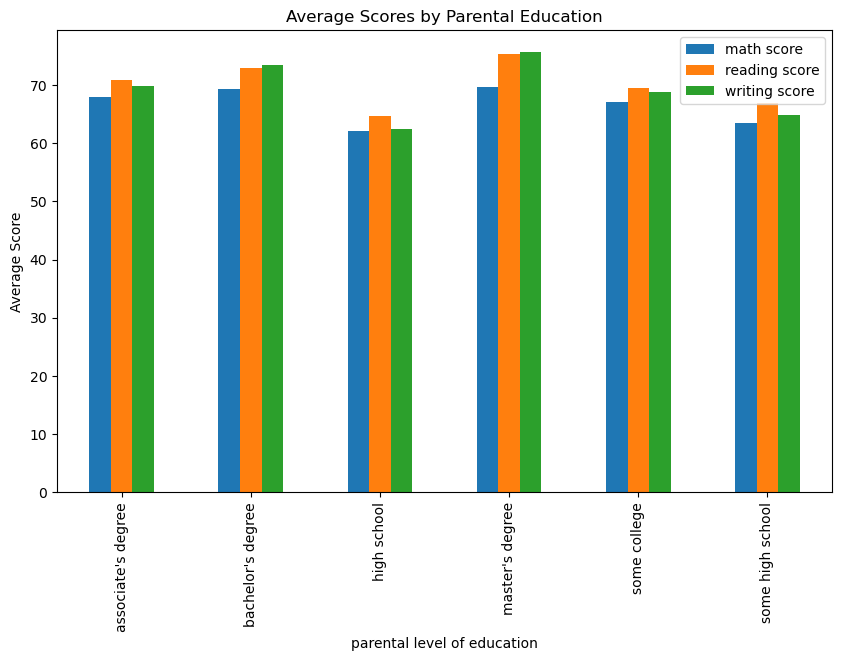

In [88]:
# 4. Plot a bar chart showing average scores grouped by parental level of education.
grouped = students_df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
grouped.plot(kind='bar', figsize=(10,6))
mlt.ylabel('Average Score')
mlt.title('Average Scores by Parental Education')
mlt.show()

In [89]:
# 5. Find students who scored above 90% in
high_scorers = students_df[(students_df['math score'] > 90) & 
                           (students_df['reading score'] > 90) & 
                           (students_df['writing score'] > 90)]
print(high_scorers)


     gender race/ethnicity parental level of education         lunch  \
114  female        group E           bachelor's degree      standard   
149    male        group E          associate's degree  free/reduced   
165  female        group C           bachelor's degree      standard   
179  female        group D            some high school      standard   
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
546  female        group A            some high school      standard   
566  female        group E           bachelor's degree  free/reduced   
571    male        group A           bachelor's degree      standard   
594  female        group C           bachelor's degree      standard   
625    male        group D                some college      standard   
685  female        group E             master's degree      standard   
712  female        group D                some college      stan

In [ ]:
 # PART 5 ....

In [91]:
# Load data
flight_df = pd.read_csv('Clean_Dataset.csv')

In [92]:
# 1. Display basic info using .info() and .describe() .
print(flight_df.info())
print(flight_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000

In [113]:
# 2. Convert date/time columns to appropriate datetime format.
flight_df = pd.read_csv('Clean_Dataset.csv')
flight_df.columns = flight_df.columns.str.strip()
flight_df['departure_time'] = flight_df['departure_time'].str.strip()
departure_dummies = pd.get_dummies(flight_df['departure_time'], prefix='departure', dtype=int)
flight_df = pd.concat([flight_df, departure_dummies], axis=1)
print(flight_df.columns[-len(departure_dummies.columns):])

print(flight_df.head())



Index(['departure_Afternoon', 'departure_Early_Morning', 'departure_Evening',
       'departure_Late_Night', 'departure_Morning', 'departure_Night'],
      dtype='object')
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  \
0          Night           Mumbai  Economy      2.17          1   5953   
1        Morning           Mumbai  Economy      2.33          1   5953   
2  Early_Morning           Mumbai  Economy      2.17          1   5956   
3      Afternoon           Mumbai  Economy      2.25          1   5955   
4        Morning           Mumbai  Economy 

In [104]:
# 3. Create columns for Journey Day and Month.
flight_df = pd.read_csv('Clean_Dataset.csv')
flight_df.columns = flight_df.columns.str.strip().str.lower()
if 'date_of_journey' in flight_df.columns:
    flight_df['date_of_journey'] = pd.to_datetime(flight_df['date_of_journey'], errors='coerce')
    flight_df['journey_day'] = flight_df['date_of_journey'].dt.day
    flight_df['journey_month'] = flight_df['date_of_journey'].dt.month
if 'airline' in flight_df.columns:
    most_frequent_airline = flight_df['airline'].mode()[0]
if 'source_city' in flight_df.columns:
    most_frequent_source = flight_df['source_city'].mode()[0]
flight_df.drop_duplicates(inplace=True)
flight_df = flight_df.ffill()



In [106]:
# 4. Find the most frequent airline and source city.
print("Most frequent airline:", flight_df['airline'].mode()[0])
print("Most frequent source city:", flight_df['source_city'].mode()[0])


Most frequent airline: Vistara
Most frequent source city: Delhi


In [107]:
# 5. Remove any duplicates and handle missing values.
flight_df.drop_duplicates(inplace=True)
flight_df.ffill(inplace=True)

